In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
pd.set_option("display.max_columns", None)


In [2]:
sp100_url = "https://en.wikipedia.org/wiki/S%26P_100"
sp100_table = pd.read_html(sp100_url)
tickers = sp100_table[2]['Symbol'].tolist()

#Time range here
start_date = "2023-12-31"
end_date = "2024-12-31"

In [3]:
sp100_data = {}
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date, interval="1d")
        sp100_data[ticker] = hist
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

$BRK.B: possibly delisted; no timezone found


In [4]:
combined_data = pd.concat(sp100_data, names=["Ticker", "Date"])
combined_data.to_csv("sp100_daily_combined.csv")

C:\Users\hughp\AppData\Local\Temp\ipykernel_21076\2558842558.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_data = pd.concat(sp100_data, names=["Ticker", "Date"])


In [5]:
df = pd.read_csv("sp100_daily_combined.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
0,AAPL,2024-01-02 00:00:00-05:00,186.033072,187.315382,182.792533,184.532089,82488700.0,0.0,0.0,NaN
1,AAPL,2024-01-03 00:00:00-05:00,183.120571,184.770668,182.335277,183.150391,58414500.0,0.0,0.0,NaN
2,AAPL,2024-01-04 00:00:00-05:00,181.062914,181.997307,179.800504,180.824356,71983600.0,0.0,0.0,NaN
3,AAPL,2024-01-05 00:00:00-05:00,180.903872,181.669266,179.094727,180.098694,62303300.0,0.0,0.0,NaN
4,AAPL,2024-01-08 00:00:00-05:00,181.003268,184.492330,180.416793,184.452560,59144500.0,0.0,0.0,NaN


In [6]:
adj_close = combined_data["Close"].unstack(level=0)  #Pivot by ticker


In [7]:
print(adj_close) # closes of each stock per day
#Our main data for this project *muscle emoji*

Ticker                           AAPL        ABBV         ABT         ACN  \
Date                                                                        
2024-01-02 00:00:00-05:00  184.532089  152.743408  107.138489  341.431366   
2024-01-03 00:00:00-05:00  183.150391  153.355057  106.816628  332.573730   
2024-01-04 00:00:00-05:00  180.824356  154.310806  108.240585  331.756866   
2024-01-05 00:00:00-05:00  180.098694  154.960693  108.065041  331.294312   
2024-01-08 00:00:00-05:00  184.452560  154.282104  109.625542  334.965302   
...                               ...         ...         ...         ...   
2024-12-23 00:00:00-05:00  254.989655  176.723465  113.713264  358.769989   
2024-12-24 00:00:00-05:00  257.916443  178.318420  114.160919  361.630005   
2024-12-26 00:00:00-05:00  258.735504  177.525894  114.668251  360.429993   
2024-12-27 00:00:00-05:00  255.309296  176.347015  114.389717  356.179993   
2024-12-30 00:00:00-05:00  251.923019  174.553925  112.211151  352.489990   

In [8]:
DailyValue = pd.DataFrame(adj_close, dtype=np.float32)
DailyValue = DailyValue.fillna(0)
DailyValue.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PLTR,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,184.532089,152.743408,107.138489,341.431366,580.070007,67.074509,138.580002,286.354218,211.642944,149.929993,106.772415,185.645386,251.759995,32.851429,50.620995,3442.918213,777.391418,49.672394,50.784554,287.037109,391.510010,78.533020,42.322155,129.580368,113.465706,646.158203,254.707367,48.586620,76.629860,141.734146,394.961121,233.425613,89.895103,93.111069,93.708572,245.823074,252.138550,99.674423,79.414551,35.588528,138.902084,137.512558,377.245605,334.705780,203.540894,154.833939,47.168285,599.175232,330.980011,153.829575,167.203125,57.621925,403.299347,587.347717,441.226562,213.632523,418.846313,288.347107,71.889877,79.474312,64.898193,344.665588,88.455704,37.613499,109.287125,90.001053,367.380585,59.338913,468.500000,104.225563,687.520020,48.149918,102.550766,166.076340,27.561720,144.247437,16.58,90.202316,61.459999,136.780594,82.845657,90.796112,67.866074,67.760323,134.383865,16.040478,137.801834,542.214966,159.024643,248.419998,163.363098,528.766113,236.856384,148.922607,41.968719,256.474731,35.816391,47.823631,52.324097,98.106003
2024-01-03 00:00:00-05:00,183.150391,153.355057,106.816628,332.573730,571.789978,66.850403,135.320007,289.531769,207.657898,148.470001,104.136009,183.683578,243.910004,32.492870,50.060471,3372.399170,761.703796,49.239319,51.359035,278.790070,386.670013,77.725502,41.973274,128.216980,115.723648,640.239380,250.441177,48.964687,76.658295,144.436462,387.513275,229.468735,90.826660,94.034477,92.535759,241.340057,250.130035,98.178703,79.643532,34.818520,139.698334,138.259003,370.920959,328.090790,199.187653,153.491730,46.428192,586.651123,322.130005,154.791183,166.474380,57.756779,402.442657,612.638794,444.128601,207.398926,415.748779,285.774719,71.344666,79.819687,64.676567,342.854126,86.678551,37.450676,110.763733,88.093681,367.113159,59.743694,470.260010,101.770317,675.299988,47.551144,100.973969,166.114777,27.561720,143.374603,16.09,90.070175,58.630001,134.215302,83.224800,90.369614,65.852692,69.089722,131.621552,16.021881,133.535812,526.939453,159.191620,238.449997,160.930908,531.403381,235.173111,148.170181,40.860004,255.592957,36.074333,47.193474,52.327374,98.930260
2024-01-04 00:00:00-05:00,180.824356,154.310806,108.240585,331.756866,567.049988,66.869881,136.009995,291.919739,208.402679,144.570007,103.194565,185.087982,244.940002,32.754520,50.263424,3382.953369,763.452209,49.563133,51.483509,280.555206,375.750000,78.163300,41.314259,127.285149,112.394653,643.873962,249.844513,48.547844,76.307617,142.853012,386.567535,231.268204,89.746445,93.758400,92.946236,239.049850,249.779007,98.653557,80.597580,35.035706,137.389252,135.741043,372.047943,328.410889,199.547989,154.220367,46.250576,582.363831,323.269989,154.464249,167.579147,57.564129,402.324524,609.465027,442.919434,206.373032,416.741577,283.202240,71.344666,80.520027,65.033104,345.491669,86.984123,37.559223,112.925537,88.323723,364.478180,59.560581,474.670013,100.068283,671.869995,47.979984,101.102074,164.693268,26.968397,144.160126,16.25,90.296722,58.450001,132.820465,83.030365,90.679802,65.695541,68.582832,131.781296,15.947493,135.057312,535.449036,159.407684,237.929993,158.739990,534.726868,234.550400,147.652893,41.299667,257.207855,36.267784,47.775154,51.821514,98.067657
2024-01-05 00:00:00-05:00,180.098694,154.960693,108.065041,331.294312,564.599976,67.240150,138.580002,291.756042,207.261322,145.240005,103.221138,186.986938,249.000000,33.365032,50.630657,3371.281250,760.421448,49.744087,52.019

In [9]:
DailyValue.to_csv("sp100_daily_value.csv")

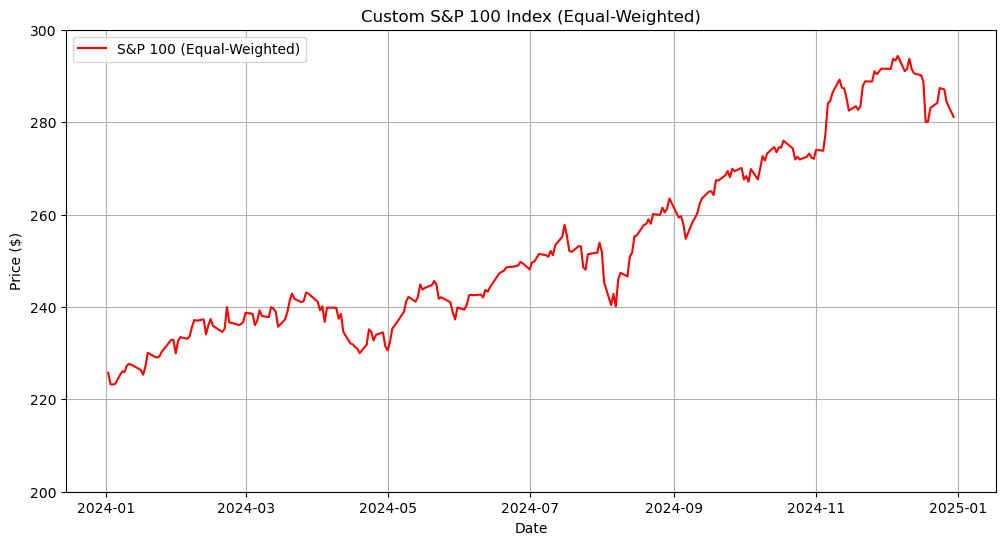

In [13]:
adj_close["SP100_EqualWeight"] = adj_close.mean(axis=1)
plt.figure(figsize=(12, 6))
sns.lineplot(data=adj_close, x=adj_close.index, y="SP100_EqualWeight", 
             label="S&P 100 (Equal-Weighted)", color="red")
plt.title("Custom S&P 100 Index (Equal-Weighted)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.ylim(200,300)
plt.show()

In [14]:
daily_returns = adj_close.pct_change() * 100

In [15]:
print(daily_returns)

Ticker                         AAPL      ABBV       ABT       ACN      ADBE  \
Date                                                                          
2024-01-02 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN   
2024-01-03 00:00:00-05:00 -0.748758  0.400442 -0.300416 -2.594265 -1.427419   
2024-01-04 00:00:00-05:00 -1.270013  0.623227  1.333086 -0.245619 -0.828974   
2024-01-05 00:00:00-05:00 -0.401308  0.421155 -0.162180 -0.139426 -0.432063   
2024-01-08 00:00:00-05:00  2.417489 -0.437910  1.444039  1.108075  2.825011   
...                             ...       ...       ...       ...       ...   
2024-12-23 00:00:00-05:00  0.306496  1.600403  0.070027 -2.074407 -0.096165   
2024-12-24 00:00:00-05:00  1.147807  0.902515  0.393670  0.797173  0.268615   
2024-12-26 00:00:00-05:00  0.317568 -0.444444  0.444401 -0.331834  0.495602   
2024-12-27 00:00:00-05:00 -1.324213 -0.664060 -0.242904 -1.179147 -0.817485   
2024-12-30 00:00:00-05:00 -1.326343 -1.016797 -1.904

In [16]:
DailyChange = pd.DataFrame(daily_returns, dtype=np.float32)
DailyChange = DailyChange.fillna(0)
DailyChange.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PLTR,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM,SP100_EqualWeight
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03 00:00:00-05:00,-0.748758,0.400442,-0.300416,-2.594265,-1.427419,-0.334115,-2.352428,1.109658,-1.882910,-0.973782,-2.469183,-1.056750,-3.118045,-1.091455,-1.107296,-2.048235,-2.017982,-0.871862,1.131214,-2.873162,-1.236238,-1.028253,-0.824345,-1.052156,1.989978,-0.916002,-1.674938,0.778130,0.037107,1.906609,-1.885716,-1.695135,1.036271,0.991728,-1.251554,-1.823676,-0.796592,-1.500606,0.288336,-2.163641,0.573245,0.542819,-1.676533,-1.976360,-2.138755,-0.866870,-1.569048,-2.090225,-2.673879,0.625113,-0.435844,0.234031,-0.212420,4.305980,0.657721,-2.917906,-0.739540,-0.892115,-0.758399,0.434574,-0.341498,-0.525571,-2.009088,-0.432884,1.351127,-2.119277,-0.072793,0.682152,0.375669,-2.355704,-1.777407,-1.243562,-1.537578,0.023144,0.000000,-0.605094,-2.955367,-0.146494,-4.604618,-1.875480,0.457650,-0.469732,-2.966699,1.961914,-2.055540,-0.115936,-3.095766,-2.817243,0.105001,-4.013365,-1.488825,0.498759,-0.710673,-0.505246,-2.641765,-0.343806,0.720179,-1.317670,0.006263,0.840170,-1.105287
2024-01-04 00:00:00-05:00,-1.270013,0.623227,1.333086,-0.245619,-0.828974,0.029136,0.509893,0.824770,0.358658,-2.626789,-0.904053,0.764578,0.422286,0.805254,0.405416,0.312958,0.229540,0.657634,0.242360,0.633142,-2.824117,0.563261,-1.570084,-0.726761,-2.876676,0.567691,-0.238245,-0.851314,-0.457455,-1.096295,-0.244054,0.784189,-1.189315,-0.293592,0.443587,-0.948954,-0.140338,0.483662,1.197898,0.623766,-1.652906,-1.821190,0.303834,0.097564,0.180903,0.474708,-0.382561,-0.730808,0.353889,-0.211210,0.663626,-0.333554,-0.029354,-0.518049,-0.272256,-0.494648,0.238798,-0.900177,0.000000,0.877403,0.551261,0.769290,0.352535,0.289840,1.951726,0.261133,-0.717757,-0.306498,0.937780,-1.672427,-0.507921,0.901851,0.126869,-0.855739,-2.152706,0.547881,0.994406,0.251523,-0.307011,-1.039253,-0.233626,0.343244,-0.238639,-0.733668,0.121366,-0.464293,1.139394,1.614907,0.135726,-0.218077,-1.361403,0.625417,-0.264788,-0.349118,1.076023,0.631824,0.536256,1.232544,-0.966720,-0.871930,-0.023333
2024-01-05 00:00:00-05:00,-0.401308,0.421155,-0.162180,-0.139426,-0.432063,0.553717,1.889572,-0.056076,-0.547669,0.463442,0.025751,1.025975,1.657548,1.863901,0.730617,-0.345027,-0.396981,0.365098,1.041472,0.989162,-0.944774,-0.448081,0.961766,2.042081,0.042921,1.181479,-0.047765,0.019982,1.130287,-0.172591,0.909810,-1.001624,0.375449,0.050777,0.389070,0.619684,-0.889996,1.307545,-1.384957,1.408845,-0.470872,-0.483929,0.911349,1.284734,-0.668618,-1.056814,0.042666,0.374912,-0.238188,0.311272,0.501727,-0.150615,0.129716,0.659057,-0

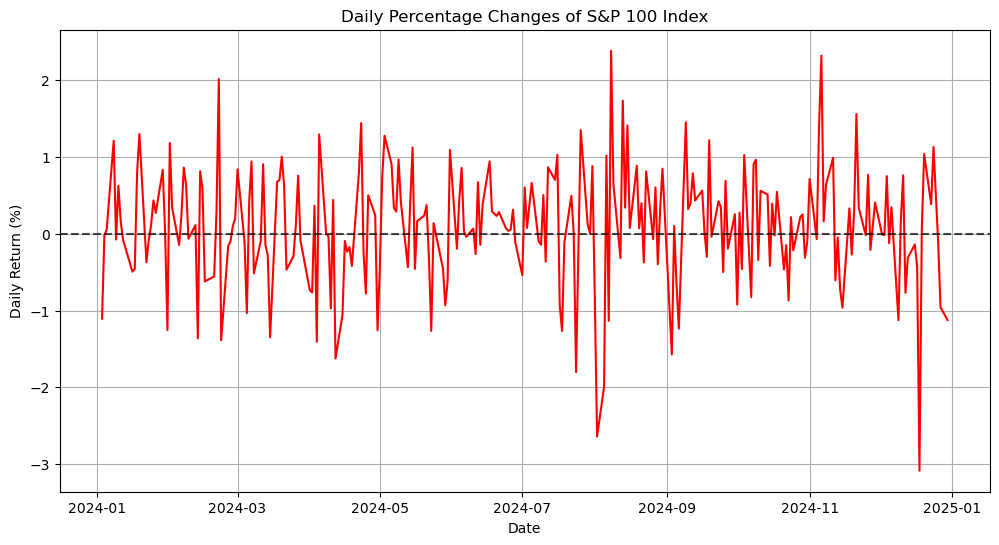

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = daily_returns,x=daily_returns.index, y="SP100_EqualWeight", color="red", )
plt.axhline(0, color="black", linestyle="--", alpha=0.7)  #0
plt.title("Daily Percentage Changes of S&P 100 Index")
plt.ylabel("Daily Return (%)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

In [ ]:
DailyChange.to_csv("sp100_daily_change.csv")